In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from keras.applications import VGG16
import keras
import boto3
import botocore
import os
import pickle
from matplotlib import pyplot as plt
%matplotlib inline
import errno
import shutil

In [3]:
zap = pd.read_csv('./zap.csv')

In [4]:
brand_dict = dict(zip(zap.brand_name.unique(),range(0,len(zap.brand_name.unique()))))
shoe_dict = dict(zip(zap.shoe_name.unique(),range(0,len(zap.shoe_name.unique()))))
color_dict = dict(zip(zap.colorway,zap.colorcode))

In [61]:
brand_dict['under armour']

15

In [ ]:
nike new balance adidas asics underarmour

In [51]:
zap.brand_name.value_counts()

nike                     2514
new balance              1771
skechers                 1718
adidas                   1507
puma                     1474
vans                     1256
asics                    1228
under armour             1044
saucony                   790
converse                  751
lacoste                   631
dc                        605
merrell                   552
ecco                      523
polo ralph lauren         441
reebok                    382
sperry                    355
keds                      336
geox                      321
fila                      307
keen                      305
diadora                   294
brooks                    278
ryka                      273
etnies                    257
steve madden              249
supra                     240
globe                     233
frye                      229
native shoes              228
                         ... 
inov-8                    192
clarks                    187
ecco sport

In [49]:
brand_dict

{'adidas': 5,
 'aldo': 49,
 'altra footwear': 29,
 'asics': 14,
 'bernie mev.': 52,
 'brooks': 17,
 'calvin klein': 53,
 'circa': 61,
 'clarks': 57,
 'cole haan': 45,
 'columbia': 28,
 'converse': 3,
 'dc': 1,
 'diadora': 58,
 'ecco': 26,
 'ecco sport': 55,
 'emerica': 60,
 'etnies': 54,
 'fila': 65,
 'five ten': 59,
 'frye': 9,
 'geox': 56,
 'globe': 48,
 'gola': 50,
 'hoka one one': 10,
 'inov-8': 11,
 'k-swiss': 34,
 'keds': 20,
 'keen': 24,
 'kenneth cole new york': 62,
 'lacoste': 6,
 'lakai': 64,
 'merrell': 25,
 'mizuno': 36,
 'native shoes': 18,
 'naturino': 51,
 'new balance': 4,
 'nike': 0,
 'osiris': 46,
 'pearl izumi': 44,
 'polo ralph lauren': 33,
 'primigi': 63,
 'propet': 23,
 'puma': 22,
 'reebok': 30,
 'reef': 40,
 'rockport': 47,
 'ryka': 31,
 'salomon': 12,
 'sanuk': 39,
 'saucony': 7,
 'seavees': 43,
 'skechers': 19,
 'sperry': 13,
 'steve madden': 2,
 'stride rite': 21,
 'superga': 37,
 'supra': 42,
 'the north face': 35,
 'tommy hilfiger': 16,
 'toms': 27,
 'treto

In [5]:
zap.shape

(26422, 10)

In [6]:
def get_shoe(shoe_dict,view,s3,BUCKET_NAME='capstoneshoes'):
    KEY = '{}/{}'.format(shoe_dict,view)
    try:
        s3.Bucket(BUCKET_NAME).download_file(KEY, '{}/{}'.format(view,shoe_dict))
    except botocore.exceptions.ClientError as e:
        if e.response['Error']['Code'] == "404":
            print("The object does not exist.")
        else:
            raise

In [7]:
def get_data(row,s3):
    views = ['lateralfrontleft']
    shoe_dict = row[1]['shoe_hash']
    print shoe_dict
    try:
        for view in views:
            path = os.makedirs('{}'.format(view))
            #row_imgs = map(lambda shoe_dict: get_shoe(shoe_dict), row[views].tolist())
            get_shoe(shoe_dict,view,s3)
    except OSError:
        for view in views:
            path = os.walk('{}'.format(view))
            #row_imgs = map(lambda shoe_dict: get_shoe(shoe_dict), row[views].tolist())
            get_shoe(shoe_dict,view,s3)
    except:    
        pass

In [8]:
s3 = boto3.resource('s3')
def bucket_connect(x):
    return get_data(x,s3)

In [9]:
import multiprocessing
from multiprocessing.pool import Pool

In [10]:
pool = Pool(processes=multiprocessing.cpu_count())

In [11]:
pool.map(bucket_connect, list(zap.iterrows()))

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [26]:
def retrieve(directory):
    file_list = []
    for subdir, dirs, files in os.walk('./{}'.format(directory)):
        for f in files:
            if f != '.DS_Store':
                file_list.append(f)
        return file_list


In [12]:
no_brand = zap['shoe_hash']

In [13]:
X = no_brand.values
y = zap.brand_name.values
skf = StratifiedKFold(n_splits=3)


In [14]:
print skf

StratifiedKFold(n_splits=3, random_state=None, shuffle=False)


In [15]:
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

('TRAIN:', array([ 2713,  2716,  2868, ..., 26419, 26420, 26421]), 'TEST:', array([    0,     1,     2, ..., 17268, 17277, 17305]))
('TRAIN:', array([    0,     1,     2, ..., 26419, 26420, 26421]), 'TEST:', array([ 2713,  2716,  2868, ..., 23732, 24232, 25121]))
('TRAIN:', array([    0,     1,     2, ..., 23732, 24232, 25121]), 'TEST:', array([ 4581,  4583,  4586, ..., 26419, 26420, 26421]))


In [35]:
def move_files(splits,name_folder,trainorsplit):
    data = retrieve(name_folder)
    for i in splits:
        brand_val = i.rsplit('_')[0]
        try:
            path = os.makedirs('{}/{}/'.format(trainorsplit,brand_val))
        except:
            pass
        try:
            source = './{}/{}'.format(name_folder,i)
            new = '{}/{}/'.format(trainorsplit,brand_val)
            shutil.move(source,new)
        except:
            pass

In [38]:
move_files(y_test,'lateralfrontleft','y_test')

In [23]:
X_train[0].rsplit('_')[0]

'0'

In [42]:
ls

6pm.csv          lateralfrontleft/      X_train/  zap.csv
bucketing.ipynb  tensorsbeflowin.ipynb  y_test/   zappos.csv
cleaning.ipynb   X_test/                y_train/


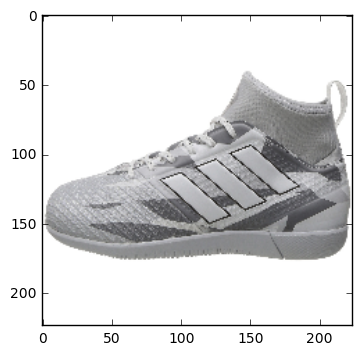

In [50]:
from scipy.misc import imread
plt.imshow(np.load('lateral_keras/train/5/5_1004_679354'))

In [146]:
X_train[0][-1]

'0_0_684832'

In [10]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model
import numpy as np

#Get back the convolutional part of a VGG network trained on ImageNet
model_vgg16_conv = VGG16(weights='imagenet', include_top=False)
model_vgg16_conv.summary()

#Create your own input format (here 3x200x200)
input = Input(shape=(224,224,3),name = 'image_input')

#Use the generated model 
output_vgg16_conv = model_vgg16_conv(input)

#Add the fully-connected layers 
x = Flatten(name='flatten')(output_vgg16_conv)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(8, activation='softmax', name='predictions')(x)

#Create your own model 
my_model = Model(input=input, output=x)

#In the summary, weights and layers from VGG part will be hidden, but they will be fit during the training
my_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:25: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("pr..., inputs=Tensor("im...)`


In [26]:
features_for_train_data = my_model.predict(X_train)
features_for_test_data = my_model.predict(X_val)
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
my_model.compile(optimizer=adam,
              loss='mse',
              metrics=['accuracy'])

my_model.fit(features_for_train_data, y_train,
          nb_epoch=80,
          batch_size=32,
          validation_data=(features_for_test_data, y_val))

ValueError: Error when checking : expected input_9 to have 4 dimensions, but got array with shape (17700, 9)

In [20]:
# Generate a model with all layers (with top)
vgg16 = VGG16(weights=None, include_top=True)

#Add a layer where input is the output of the  second last layer 
x = Dense(8, activation='softmax', name='predictions')(vgg16.layers[-2].output)

#Then create the corresponding model 
my_model = Model(input=vgg16.input, output=x)
my_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("pr..., inputs=Tensor("in...)`
